# Study on Communities and Crime Data Set 

## Data Set Description
__Abstract__: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

| Data Set Description
| :------------- |:------------- |
| Data Set Characteristics: | Multivariate 
| Number of Instances: | 1994 |
| Area:     | Social      
| Number of Attributes: | 128 
| Date Donated | 2009-07-13      
| Associated Tasks: | Regression

## Load Data Set and Library
We generate the attributes names list for loading the data by doing some tricks on the meta data of the data set. Load the data as pandas dataframe.

In [88]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
# Attribute names extract from meta data
names = ['state', 'county', 'community', 'communityname', 'fold', 'population', 
         'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 
         'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 
         'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 
         'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 
         'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 
         'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 
         'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
         'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 
         'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 
         'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 
         'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 
         'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 
         'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 
         'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 
         'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 
         'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 
         'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 
         'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 
         'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 
         'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 
         'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 
         'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 
         'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 
         'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 
         'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 
         'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 
         'ViolentCrimesPerPop']

# Load the data
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data",
                 delim_whitespace=False, na_values='?', names=names)

___Attribute Information___: (122 predictive, 5 non-predictive, 1 goal)

First 5 attributes are not predictive, so we start from the 6th to the 122nd attribute. The last one is goal.

As we can see, there are NaN values in the data. We just fill the empty blocks with mean value of that column.

In [155]:
df.head(6)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
5,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14


In [91]:
# goal
y = df['ViolentCrimesPerPop']
# 122 predictive attributes
X = df.loc[:, 'population': 'PolicBudgPerPop'].fillna(df.mean()).values
# First 5 not predictive attributes
X_info = df.loc[:, 'state']

## L1 Regularization 
We first calculate the RSS of linear regression with different alphas. We use the range from log-5 to 0.1. K fold cross validation is used to get a accurate result of the RSS.

In [92]:
import sklearn.model_selection

# kfold
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold, shuffle=True)

# alpha value from 10**-5 to 10**-1, 10 samples
nalpha = 50
alpha_test = np.logspace(-5, -1, nalpha)

# create linear regression model with L1 regulation
reg = linear_model.Lasso(warm_start=True)

# define RSS
RSS = np.zeros((nalpha, nfold))

for isplit, Ind in enumerate(kf.split(X)):
    print("fold = %d" % isplit)
    Itr, Its = Ind
    Xtr = X[Itr, :]
    ytr = y[Itr]
    Xts = X[Its, :]
    yts = y[Its]
    for it, a in enumerate(alpha_test):
        reg.alpha = a
        reg.fit(Xtr, ytr);
        yhat = reg.predict(Xts)
        RSS[it, isplit] = np.mean((yhat - yts) ** 2)


fold = 0
fold = 1
fold = 2
fold = 3
fold = 4
fold = 5
fold = 6
fold = 7
fold = 8
fold = 9


### 1 Standard Error Rule
Plot the RSS with respect to different alpha. And we calculate the standard deviation of RSS for next step to apply 1 SE rule. As we can see, the lowest RSS is in the middle of the range.


Text(0,0.5,'Test RSS')

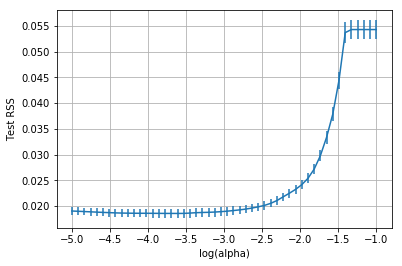

In [93]:
# mean RSS with respect to 10 fold
RSS_mean = np.mean(RSS, axis=1)
# standard error
RSS_std = np.std(RSS, axis=1) / np.sqrt(nfold)
# Plot the graph
plt.errorbar(np.log10(alpha_test), RSS_mean, yerr=RSS_std)
plt.grid()
plt.xlabel('log(alpha)')
plt.ylabel('Test RSS')


To simplify the model while retain as much attributes, 1 SE rule is applied. And we can get the optimal alpha value and its corresponding RSS.

In [94]:
# index of least RSS
imin = np.argmin(RSS_mean)
# least RSS
alpha_min = alpha_test[imin]
# 1 standard deviation rule
RSS_tgt = RSS_mean[imin] + RSS_std[imin]
iopt = np.where(RSS_mean <= RSS_tgt)[0][-1]
alpha_opt = alpha_test[iopt]

print("The optimal alpha = %12.4e" % alpha_opt)
print("Mean test RSS = %f" % RSS_mean[iopt])


The optimal alpha =   1.9307e-03
Mean test RSS = 0.019412


Do the model fitting using the optimal alpha we get in previous step, and print out the attribute names whose coefficient is not zero. These attributes have a more influential to the predictable goal attribute.

In [95]:
# try model fitting using optimal alpha
model = linear_model.Lasso(alpha=alpha_opt, warm_start=True)
model.fit(X, y)
# print the attributes whose coefficient is not 0
coef = model.coef_
# index is extracted from the 6th attributes, so +5
l1_coe = np.where(coef != 0)[0] + 5
related_para = df.columns[l1_coe]
nn_in = related_para.size
print(related_para)

Index(['racepctblack', 'racePctWhite', 'pctUrban', 'MalePctDivorce',
       'PctKids2Par', 'PctWorkMom', 'PctIlleg', 'PctPersDenseHous',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'NumStreet',
       'LemasPctOfficDrugUn'],
      dtype='object')


Sort the dominant attributes by its coefficient values, we get a rank of these attributes from the lowest influence to the highest. 

In [129]:
ind = np.argsort(np.abs(coef[l1_coe-5]))
related_para[ind]
#np.sort(np.abs(coef[l1_coe-5]))

Index(['NumStreet', 'LemasPctOfficDrugUn', 'PctVacantBoarded', 'PctWorkMom',
       'PctHousOccup', 'pctUrban', 'racepctblack', 'PctPersDenseHous',
       'MalePctDivorce', 'HousVacant', 'racePctWhite', 'PctIlleg',
       'PctKids2Par'],
      dtype='object')

## SVR and Linear Regression
We do linear regression, support vector regressionon and nueral network one by one on the whole data set with the selected attributes.

In [12]:
# Assign the data of dominant attributes into X and the goal attribute in y. X_info is used to store the 
# first 5 unpredictive attributes.
X = np.array(df[related_para])
X_info = np.array(X_info)
y = np.array(y)

# Doing linear regression and print out the total loss
linear = linear_model.LinearRegression()
linear.fit(X, y)
y_pre_linear = linear.predict(X)
loss_linear = np.mean((y_pre_linear - y) ** 2)
print("Loss of linear regression is {}. ".format(loss_linear))

# Doing support vector regression
from sklearn import svm

# Calculate for optimal C
C_range = np.linspace(10, 50, 100)
C_loss = []
for c in C_range:
    svr = svm.SVR(C=c)
    svr.fit(X, y)
    y_pre_svr = svr.predict(X)
    loss_svr = np.mean((y_pre_svr - y) ** 2)
    C_loss.append(loss_svr)

c_arg_min = np.argmin(C_loss)
C_opt = C_range[c_arg_min]

# Run support vector regression with the optimal c and print the loss
svr = svm.SVR(C=C_opt)
svr.fit(X, y)
y_pre_svr = svr.predict(X)
loss_svr = np.mean((y_pre_svr - y) ** 2)
print("Loss of SVM is {}".format(loss_svr))


Loss of linear regression is 0.018421184024430454. 
Loss of SVM is 0.015925207413192612


## 2 Layers Neural Network
We use keras with tensorflow as backend to do neural network. There are 2 layers in the model, one hidden layer and one output layer. The output number of the hidden layer is the same as the input. And in the output layer, there is only one output.

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

nin = related_para.shape[0]
model = Sequential()
model.add(Dense(nin, input_dim=nin, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
for step in range(5001):  
    cost = model.train_on_batch(X, y)  
    if step % 500 == 0:  
        print("After %d trainings, the cost: %f" % (step, cost))  

After 0 trainings, the cost: 0.013871
After 500 trainings, the cost: 0.013869
After 1000 trainings, the cost: 0.013869
After 1500 trainings, the cost: 0.013874
After 2000 trainings, the cost: 0.013873
After 2500 trainings, the cost: 0.013868
After 3000 trainings, the cost: 0.013867
After 3500 trainings, the cost: 0.013876
After 4000 trainings, the cost: 0.013867
After 4500 trainings, the cost: 0.013872
After 5000 trainings, the cost: 0.013867


In [127]:
# Print the loss of nn
y_pre_nn = model.predict(X)
print(np.mean((y_pre_nn - y)**2))

0.019101400758822194


## Visualization of the Results
To visualize the predict value of each model, we export the results to a 'csv' file and plot the figure in our web page.

In [137]:
# Generate predict data and actual data refer to state
import warnings
import csv
warnings.filterwarnings("ignore")
index = ['state', 'population']
Loop = ['sample', 'linear', 'svr', 'nn']
filename = 'y_data.json'
for s in Loop:
    data = df[index]
    if (s == 'linear'):
        filename = 'y_data_linear.csv'
        data.loc[:, 'ViolentCrimesPerPop'] = pd.Series(y_pre_linear, index=df.index).values
        data['ViolentCrimesPerPop'] = data['ViolentCrimesPerPop'] * data['population']
    elif (s == 'svr'):
        filename = 'y_data_svr.csv'
        data.loc[:, 'ViolentCrimesPerPop'] = pd.Series(y_pre_svr, index=df.index).values
        data['ViolentCrimesPerPop'] = data['ViolentCrimesPerPop'] * data['population']
    elif (s == 'nn'):
        filename = 'y_data_nn.csv'
        data.loc[:, 'ViolentCrimesPerPop'] = pd.Series(y_pre_nn, index=df.index).values
        data['ViolentCrimesPerPop'] = data['ViolentCrimesPerPop'] * data['population']
    else:
        filename = 'y_data.csv'
        data.loc[:, 'ViolentCrimesPerPop'] = df['ViolentCrimesPerPop'] * df['population']
    data = data.groupby(['state']).sum()
    data['ViolentCrimesPerPop'] = data['ViolentCrimesPerPop'] / data['population']
    data = data[['ViolentCrimesPerPop']]
    data['state'] = data.index
    data = data[['state', 'ViolentCrimesPerPop']]
    y_out = data.to_csv(sep = ' ', header = False, index = False)
    with open(filename,'w') as file:
        for lines in y_out:
            file.write(lines)

## Reference
U. S. Department of Commerce, Bureau of the Census, Census Of Population And Housing 1990 United States: Summary Tape File 1a & 3a (Computer Files), 


U.S. Department Of Commerce, Bureau Of The Census Producer, Washington, DC and Inter-university Consortium for Political and Social Research Ann Arbor, Michigan. (1992) 


U.S. Department of Justice, Bureau of Justice Statistics, Law Enforcement Management And Administrative Statistics (Computer File) U.S. Department Of Commerce, Bureau Of The Census Producer, Washington, DC and Inter-university Consortium for Political and Social Research Ann Arbor, Michigan. (1992) 


U.S. Department of Justice, Federal Bureau of Investigation, Crime in the United States (Computer File) (1995) 


Redmond, M. A. and A. Baveja: A Data-Driven Software Tool for Enabling Cooperative Information Sharing Among Police Departments. European Journal of Operational Research 141 (2002) 660-678.